In [103]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

url = './data/VN30.csv'
df = pd.read_csv(url)

In [104]:
# Preprocess the data
data = df['Price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [105]:
# Create the input and output sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length - 1):
        x.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(x), np.array(y)
seq_length = 10
x, y = create_sequences(data, seq_length)


In [106]:
split_idx = int(len(x)*0.8)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [107]:
x.shape

(2624, 10)

In [108]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [109]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)

2023-05-02 21:03:33.290893: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-02 21:03:33.295834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-02 21:03:33.301319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-05-02 21:03:34.942877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-02 21:03:34.945700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-02 21:03:34.950720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

66/66 [==============================] - 12s 23ms/step - loss: 0.0081
Epoch 2/100
66/66 [==============================] - 2s 30ms/step - loss: 3.3634e-04
Epoch 3/100
66/66 [==============================] - 2s 30ms/step - loss: 3.2921e-04
Epoch 4/100
66/66 [==============================] - 2s 23ms/step - loss: 3.0896e-04
Epoch 5/100
66/66 [==============================] - 2s 26ms/step - loss: 3.2568e-04
Epoch 6/100
66/66 [==============================] - 2s 25ms/step - loss: 3.0845e-04
Epoch 7/100
66/66 [==============================] - 2s 35ms/step - loss: 2.9294e-04
Epoch 8/100
66/66 [==============================] - 1s 21ms/step - loss: 3.0583e-04
Epoch 9/100
66/66 [==============================] - 2s 25ms/step - loss: 2.8517e-04
Epoch 10/100
66/66 [==============================] - 3s 38ms/step - loss: 2.7054e-04
Epoch 11/100
66/66 [==============================] - 2s 27ms/step - loss: 2.8745e-04
Epoch 12/100
66/66 [==============================] - 2s 32ms/step - loss: 2.6

In [110]:
y_test.shape

(525,)

In [111]:
x_test.shape

(525, 10, 1)

In [112]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform([y_test])



rmse = np.sqrt(np.mean(((predictions - y_true) ** 2)))
print('RMSE: %.2f' % rmse)

mae = np.mean(np.abs(predictions - y_true))
print('MAE: %.2f' % mae)

mape = np.mean(np.abs((predictions - y_true) / y_true)) * 100
print('MAPE: %.2f%%' % mape)


2023-05-02 21:06:12.450747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-02 21:06:12.453410: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-02 21:06:12.455366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 [==============================] - 1s 6ms/step
RMSE: 259.15
MAE: 207.77
MAPE: 16.61%


In [113]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, })
def adjust(val, length= 6): return str(val).ljust(length)

In [114]:
print('\nForecast Accuracy of: VN Index')
accuracy_prod = forecast_accuracy(predictions.flatten(), y_true.flatten())
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: VN Index
mape   :  0.0121
me     :  4.412
mae    :  15.3005
mpe    :  0.004
rmse   :  21.1666


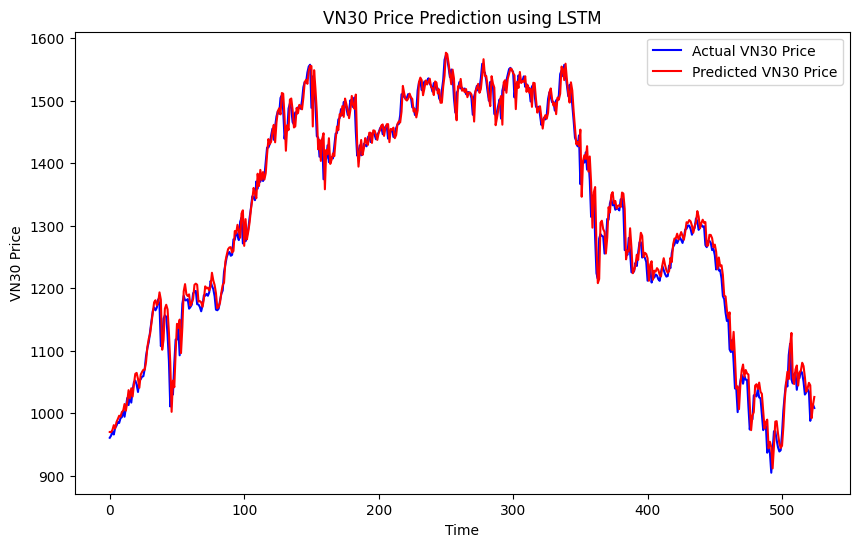

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, y_true.shape[1]), y_true.flatten(), color='blue', label='Actual VN30 Price')
plt.plot(np.arange(0, len(predictions)), predictions.flatten(), color='red', label='Predicted VN30 Price')
plt.title('VN30 Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('VN30 Price')
plt.legend()
plt.show()

In [116]:
len(y_true)

1

In [117]:
y_true.shape[1]

525

In [118]:
np.arange(0, y_true.shape[1]).shape

(525,)